In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read test and training data from csv file
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

# Part I: Regression: Predict sale price

##  I.	Preprocess the data, e.g., visualization, description, scaling, creating new features, et al. (3 pts)

In [5]:
# set read test Data set
X_test= test_data.drop('SalePrice', axis=1)
y_test = np.log(test_data['SalePrice'])

In [ ]:
X_test

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,68,11250,Pave,IR1,2001,434,920,Y,920,866,...,2,1,3,1,6,1,2001,2,608,0
1,85,14115,Pave,IR1,1993,64,796,Y,796,566,...,1,1,1,1,5,0,1993,2,480,40
2,66,13695,Pave,Reg,2004,468,1114,Y,1114,0,...,1,1,3,1,6,0,2004,2,576,0
3,70,7560,Pave,Reg,1958,525,1029,Y,1339,0,...,1,0,3,1,6,0,1958,1,294,0
4,50,8500,Pave,Reg,1920,649,649,N,649,668,...,1,0,3,1,6,0,1920,1,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,80,10721,Pave,IR1,1959,1252,1252,Y,1252,0,...,1,0,3,1,7,0,1960,2,528,0
222,60,21930,Pave,IR3,2005,732,732,Y,734,1104,...,2,1,4,1,7,1,2005,2,372,100
223,80,8400,Pave,Reg,1962,1319,1319,Y,1537,0,...,1,1,3,1,7,1,1962,2,462,0
224,70,8400,Pave,Reg,1966,0,814,Y,913,0,...,1,0,3,1,6,0,1990,1,240,0


In [6]:
# analyze training values 
X = train_data.drop('SalePrice', axis=1)

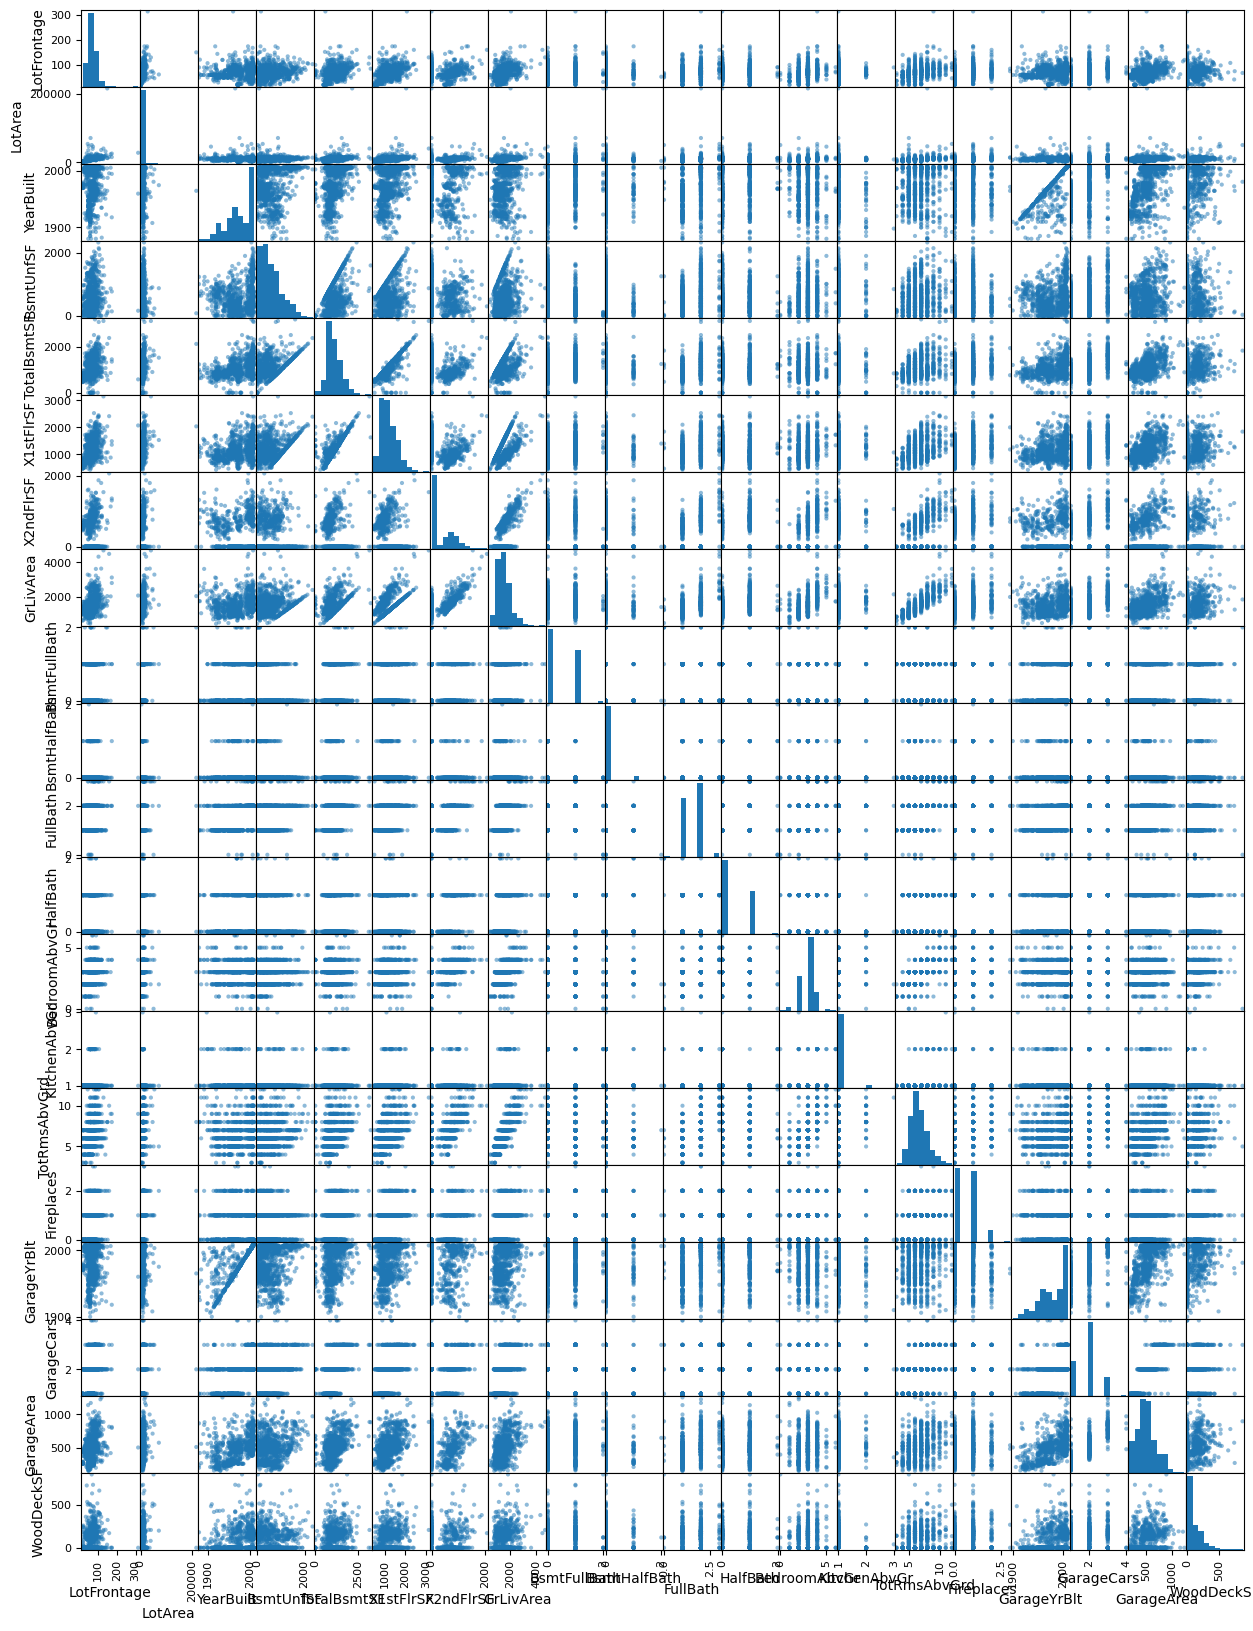

In [7]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, figsize=(15, 20))
plt.show()

In [ ]:
# find the outliner data for LotArea
X['LotArea'].hist()

plt.show()

In [288]:
# Get and analyize  the data of LotArea

# check the data 
print(f"The number of data LotArea that are greater than 50000 is {sum(X['LotArea']>50000)}")

print(f"The number of data LotArea that are greater than 30000 is {sum(X['LotArea']>30000)}")

train_data_New = train_data.copy()

The number of data LotArea that are greater than 50000 is 4
The number of data LotArea that are greater than 30000 is 11


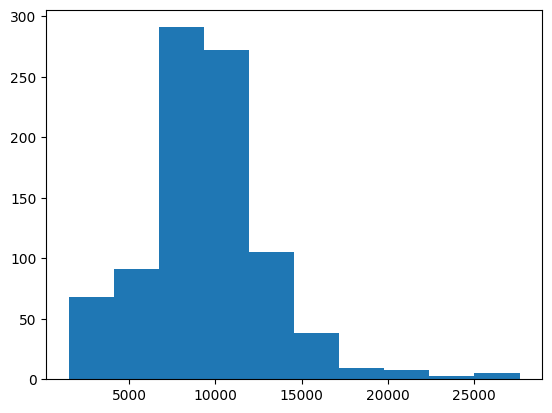

In [290]:
# keep the data row while LotArea less than 30000
train_data_New = train_data_New[train_data_New['LotArea']< 30000]
X_train = train_data_New.drop('SalePrice', axis=1)
y_train = np.log(train_data_New['SalePrice'])

plt.hist(X_train['LotArea'])
plt.show()

In [291]:
X_train

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,65,8461,Pave,Reg,2005,728,728,Y,728,728,...,2,1,3,1,8,1,2005,2,390,0
1,110,13688,Pave,IR1,2003,556,1572,Y,1572,1096,...,2,1,3,1,10,2,2003,3,726,400
2,60,8160,Pave,Reg,1940,444,756,N,756,378,...,1,1,3,1,7,0,1940,1,240,0
3,109,14154,Pave,Reg,2006,1063,1063,Y,1071,1101,...,2,1,3,1,9,1,2006,3,947,192
4,51,6120,Pave,Reg,1931,506,715,Y,875,0,...,1,0,2,1,5,0,1931,1,180,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,80,9600,Pave,Reg,1956,546,1050,Y,1050,0,...,1,0,2,1,5,0,1956,1,338,0
896,35,4274,Pave,IR1,2006,135,1241,Y,1241,0,...,1,1,1,1,4,0,2007,2,569,0
898,75,9000,Pave,Reg,2006,1088,1088,Y,1088,871,...,2,1,3,1,8,1,2006,3,1025,208
899,50,14859,Pave,IR1,2006,1670,1670,Y,1670,0,...,2,0,3,1,7,1,2006,3,690,144


In [292]:
# prepare data and data standardize
# number_feature = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
# cat_feature = X_train.select_dtypes(include=['object']).columns.tolist()

number_feature = ['LotFrontage', 'LotArea', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', 
    'X1stFlrSF', 'X2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageYrBlt','GarageArea', 'WoodDeckSF',  'GarageCars']

cat_feature = ['Street','LotShape', 'CentralAir']


In [ ]:
#plot all number feature
X_train[number_feature].hist(bins=30, figsize=(12,15))

In [ ]:
# Log scale for number feature
# X_train['LotFrontage'] = np.log1p(X_train['LotFrontage'])
# X_train['LotArea'] = np.log1p(X_train['LotArea'])
# X_train['BsmtUnfSF'] = np.log1p(X_train['BsmtUnfSF'])
# X_train['TotalBsmtSF'] = np.log1p(X_train['TotalBsmtSF'])
# X_train['YearBuilt'] = np.log1p(X_train['YearBuilt'])
# X_train['LotFrontage'] = np.log1p(X_train['LotFrontage'])
# X_train['X1stFlrSF'] = np.log1p(X_train['X1stFlrSF'])
# X_train['GarageYrBlt'] = np.log1p(X_train['GarageYrBlt'])
# X_train['GrLivArea'] = np.log1p(X_train['GrLivArea'])
# X_train['GarageArea'] = np.log1p(X_train['GarageArea'])
# X_train['GarageYrBlt'] = np.log1p(X_train['GarageYrBlt'])
# X_train['WoodDeckSF'] = np.log1p(X_train['WoodDeckSF'])

In [293]:
X_train

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,65,8461,Pave,Reg,2005,728,728,Y,728,728,...,2,1,3,1,8,1,2005,2,390,0
1,110,13688,Pave,IR1,2003,556,1572,Y,1572,1096,...,2,1,3,1,10,2,2003,3,726,400
2,60,8160,Pave,Reg,1940,444,756,N,756,378,...,1,1,3,1,7,0,1940,1,240,0
3,109,14154,Pave,Reg,2006,1063,1063,Y,1071,1101,...,2,1,3,1,9,1,2006,3,947,192
4,51,6120,Pave,Reg,1931,506,715,Y,875,0,...,1,0,2,1,5,0,1931,1,180,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,80,9600,Pave,Reg,1956,546,1050,Y,1050,0,...,1,0,2,1,5,0,1956,1,338,0
896,35,4274,Pave,IR1,2006,135,1241,Y,1241,0,...,1,1,1,1,4,0,2007,2,569,0
898,75,9000,Pave,Reg,2006,1088,1088,Y,1088,871,...,2,1,3,1,8,1,2006,3,1025,208
899,50,14859,Pave,IR1,2006,1670,1670,Y,1670,0,...,2,0,3,1,7,1,2006,3,690,144


In [294]:
X_test

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,68,11250,Pave,IR1,2001,434,920,Y,920,866,...,2,1,3,1,6,1,2001,2,608,0
1,85,14115,Pave,IR1,1993,64,796,Y,796,566,...,1,1,1,1,5,0,1993,2,480,40
2,66,13695,Pave,Reg,2004,468,1114,Y,1114,0,...,1,1,3,1,6,0,2004,2,576,0
3,70,7560,Pave,Reg,1958,525,1029,Y,1339,0,...,1,0,3,1,6,0,1958,1,294,0
4,50,8500,Pave,Reg,1920,649,649,N,649,668,...,1,0,3,1,6,0,1920,1,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,80,10721,Pave,IR1,1959,1252,1252,Y,1252,0,...,1,0,3,1,7,0,1960,2,528,0
222,60,21930,Pave,IR3,2005,732,732,Y,734,1104,...,2,1,4,1,7,1,2005,2,372,100
223,80,8400,Pave,Reg,1962,1319,1319,Y,1537,0,...,1,1,3,1,7,1,1962,2,462,0
224,70,8400,Pave,Reg,1966,0,814,Y,913,0,...,1,0,3,1,6,0,1990,1,240,0


In [297]:
# list features need to log
log_features = [
    'LotFrontage', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'YearBuilt',
    'X1stFlrSF', 'GarageYrBlt', 'GrLivArea', 'GarageArea', 'WoodDeckSF','X2ndFlrSF'
]
#  X_train  X_test 
for col in log_features:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])


In [298]:
X_test

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,0.975466,1.204434,Pave,IR1,1.148013,1.083935,1.117514,Y,1.117514,1.114972,...,2,1,3,1,6,1,1.148013,2,1.099563,NaN
1,0.991126,1.210928,Pave,IR1,1.147866,0.971052,1.111386,Y,1.111386,1.096325,...,1,1,1,1,5,0,1.147866,2,1.088708,0.934207
2,0.973301,1.210074,Pave,Reg,1.148069,1.087517,1.125385,Y,1.125385,NaN,...,1,1,3,1,6,0,1.148069,2,1.097121,NaN
3,0.977552,1.192595,Pave,Reg,1.147211,1.092878,1.122151,Y,1.132722,NaN,...,1,0,3,1,6,0,1.147211,1,1.064591,NaN
4,0.952309,1.196149,Pave,Reg,1.146484,1.102479,1.102479,N,1.102479,1.103757,...,1,0,3,1,6,0,1.146484,1,1.056087,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.986960,1.203031,Pave,IR1,1.147230,1.130068,1.130068,Y,1.130068,NaN,...,1,0,3,1,7,0,1.147249,2,1.093141,NaN
222,0.966273,1.223039,Pave,IR3,1.148087,1.107768,1.107768,Y,1.107886,1.125020,...,2,1,4,1,7,1,1.148087,2,1.076454,1.001987
223,0.986960,1.195793,Pave,Reg,1.147286,1.132130,1.132130,Y,1.138081,NaN,...,1,1,3,1,7,1,1.147286,2,1.086908,NaN
224,0.977552,1.195793,Pave,Reg,1.147362,NaN,1.112343,Y,1.117194,NaN,...,1,0,3,1,6,0,1.147810,1,1.053900,NaN


In [299]:
X_train

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,0.972187,1.196011,Pave,Reg,1.148087,1.107529,1.107529,Y,1.107529,1.107529,...,2,1,3,1,8,1,1.148087,2,1.078771,NaN
1,1.008159,1.210060,Pave,IR1,1.148050,1.095513,1.138945,Y,1.138945,1.124725,...,2,1,3,1,10,2,1.148050,3,1.107410,1.080004
2,0.966273,1.194917,Pave,Reg,1.146869,1.085023,1.109167,N,1.109167,1.077241,...,1,1,3,1,7,0,1.146869,1,1.053900,NaN
3,1.007574,1.211006,Pave,Reg,1.148105,1.123481,1.123481,Y,1.123786,1.124910,...,2,1,3,1,9,1,1.148105,3,1.118720,1.041612
4,0.953860,1.186048,Pave,Reg,1.146696,1.091171,1.106744,Y,1.115408,NaN,...,1,0,2,1,5,0,1.146696,1,1.037946,0.949083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.986960,1.199782,Pave,Reg,1.147173,1.094682,1.122978,Y,1.122978,NaN,...,1,0,2,1,5,0,1.147173,1,1.071688,NaN
896,0.922790,1.174486,Pave,IR1,1.148105,1.020956,1.129718,Y,1.129718,NaN,...,1,1,1,1,4,0,1.148124,2,1.096566,NaN
898,0.982453,1.197863,Pave,Reg,1.148105,1.124427,1.124427,Y,1.124427,1.115215,...,2,1,3,1,8,1,1.148105,3,1.121991,1.046087
899,0.952309,1.212374,Pave,IR1,1.148105,1.141250,1.141250,Y,1.141250,NaN,...,2,0,3,1,7,1,1.148105,3,1.105185,1.024864


In [ ]:
scatter_matrix(X_train, figsize=(15, 12))
plt.show()

In [ ]:
X_train[number_feature].hist(bins=30, figsize=(12,15))

In [ ]:
# preprocessor pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# numbers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler())
])

# object
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(transformers = [
     ('num', num_transformer, number_feature),
    ('cat', cat_transformer, cat_feature),
])

x_prepared = preprocessor.fit_transform(X_train)
test_x_prepare = preprocessor.transform(X_test)

# num_pipeline = make_pipeline(
#     SimpleImputer(strategy='median'),
#     StandardScaler()
# )

# cat_pipeline = make_pipeline(
#     SimpleImputer(strategy='most_frequent'),
#     OneHotEncoder(handle_unknown='ignore')
# )

# preprocessing = ColumnTransformer([
#     ('num', num_pipeline, number_feature),
#     ('cat', cat_pipeline, cat_feature)
# ])



In [301]:
X_test

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,0.975466,1.204434,Pave,IR1,1.148013,1.083935,1.117514,Y,1.117514,1.114972,...,2,1,3,1,6,1,1.148013,2,1.099563,NaN
1,0.991126,1.210928,Pave,IR1,1.147866,0.971052,1.111386,Y,1.111386,1.096325,...,1,1,1,1,5,0,1.147866,2,1.088708,0.934207
2,0.973301,1.210074,Pave,Reg,1.148069,1.087517,1.125385,Y,1.125385,NaN,...,1,1,3,1,6,0,1.148069,2,1.097121,NaN
3,0.977552,1.192595,Pave,Reg,1.147211,1.092878,1.122151,Y,1.132722,NaN,...,1,0,3,1,6,0,1.147211,1,1.064591,NaN
4,0.952309,1.196149,Pave,Reg,1.146484,1.102479,1.102479,N,1.102479,1.103757,...,1,0,3,1,6,0,1.146484,1,1.056087,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.986960,1.203031,Pave,IR1,1.147230,1.130068,1.130068,Y,1.130068,NaN,...,1,0,3,1,7,0,1.147249,2,1.093141,NaN
222,0.966273,1.223039,Pave,IR3,1.148087,1.107768,1.107768,Y,1.107886,1.125020,...,2,1,4,1,7,1,1.148087,2,1.076454,1.001987
223,0.986960,1.195793,Pave,Reg,1.147286,1.132130,1.132130,Y,1.138081,NaN,...,1,1,3,1,7,1,1.147286,2,1.086908,NaN
224,0.977552,1.195793,Pave,Reg,1.147362,NaN,1.112343,Y,1.117194,NaN,...,1,0,3,1,6,0,1.147810,1,1.053900,NaN


In [302]:
X_train

,LotFrontage,LotArea,Street,LotShape,YearBuilt,BsmtUnfSF,TotalBsmtSF,CentralAir,X1stFlrSF,X2ndFlrSF,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,0.972187,1.196011,Pave,Reg,1.148087,1.107529,1.107529,Y,1.107529,1.107529,...,2,1,3,1,8,1,1.148087,2,1.078771,NaN
1,1.008159,1.210060,Pave,IR1,1.148050,1.095513,1.138945,Y,1.138945,1.124725,...,2,1,3,1,10,2,1.148050,3,1.107410,1.080004
2,0.966273,1.194917,Pave,Reg,1.146869,1.085023,1.109167,N,1.109167,1.077241,...,1,1,3,1,7,0,1.146869,1,1.053900,NaN
3,1.007574,1.211006,Pave,Reg,1.148105,1.123481,1.123481,Y,1.123786,1.124910,...,2,1,3,1,9,1,1.148105,3,1.118720,1.041612
4,0.953860,1.186048,Pave,Reg,1.146696,1.091171,1.106744,Y,1.115408,NaN,...,1,0,2,1,5,0,1.146696,1,1.037946,0.949083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.986960,1.199782,Pave,Reg,1.147173,1.094682,1.122978,Y,1.122978,NaN,...,1,0,2,1,5,0,1.147173,1,1.071688,NaN
896,0.922790,1.174486,Pave,IR1,1.148105,1.020956,1.129718,Y,1.129718,NaN,...,1,1,1,1,4,0,1.148124,2,1.096566,NaN
898,0.982453,1.197863,Pave,Reg,1.148105,1.124427,1.124427,Y,1.124427,1.115215,...,2,1,3,1,8,1,1.148105,3,1.121991,1.046087
899,0.952309,1.212374,Pave,IR1,1.148105,1.141250,1.141250,Y,1.141250,NaN,...,2,0,3,1,7,1,1.148105,3,1.105185,1.024864


## II.	(Model-0) Use linear regression to fit the training data, then calculate the training and test MSE. (3 pts) 

In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(x_prepared, y_train)

# training MSE
y_train_pred_lin = linear_reg.predict(x_prepared)
lin_train_mse = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred_lin)))
lin_train_logmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))

# Test MSE
y_test_pred_lin = linear_reg.predict(test_x_prepare)
lin_test_mse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred_lin)))
lin_test_logmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

print(f"Training RMSE(SalePrice): ${lin_train_mse:.2f}")
print(f"Training RMSE(log(SalePrice)): ${lin_train_logmse:.4f}")

print(f"Testing RMSE(SalePrice): ${lin_test_mse:.2f}")
print(f"Testing RMSE(log(SalePrice)): ${lin_test_logmse:.4f}")

print(f"Model configerition:{linear_reg.coef_}")

Training RMSE(SalePrice): $32038.94
Training RMSE(log(SalePrice)): $0.1511
Testing RMSE(SalePrice): $48915.20
Testing RMSE(log(SalePrice)): $0.1891
Model configerition:[ 0.0217955   0.02141211  0.05378825 -0.01666757  0.05743106  0.01176066
  0.01661411  0.14870989  0.02939151  0.00701735  0.03579094  0.01266448
 -0.06262359 -0.06329481  0.0421845   0.02937875  0.02816089 -0.01115766
  0.00618491  0.05944416 -0.20892593  0.20892593 -0.00215666  0.0633647
 -0.03052133 -0.03068671 -0.05017822  0.05017822]


In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # use pipeline to creat linear regression
# linear_reg = Pipeline(steps=[
#     ('prePro', preprocessor),
#     ('linearReg', LinearRegression())
# ])

# # train the model
# linear_reg.fit(X_train, y_train)

#  # training RMSE
# y_train_pred_lin = linear_reg.predict(X_train)
# lin_train_mse = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred_lin)))
# lin_train_logmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))

# # Test RMSE
# y_test_pred_lin = linear_reg.predict(X_test)
# lin_test_mse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred_lin)))
# lin_test_logmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

# print(f"Training RMSE(SalePrice): ${lin_train_mse:.2f}")
# print(f"Training RMSE(log(SalePrice)): ${lin_train_logmse:.4f}")

# print(f"Testing RMSE(SalePrice): ${lin_test_mse:.2f}")
# print(f"Testing RMSE(log(SalePrice)): ${lin_test_logmse:.4f}")

# print(f"Model configerition:{linear_reg.named_steps['linearReg'].coef_}")


## III.	(Model-1) Use Lasso regression to fit the training data. Are there any variables that are deleted from the model? Calculate the training and test MSEs. You may choose the hyperparameter using grid search.

In [ ]:
# from sklearn.linear_model import Lasso

# # creat lasso model
# # lasso_pipe = Pipeline(steps=[
# #     ('preprocessor', preprocessor),
# #     ('lasso', Lasso(max_iter=10000))
# # ])



In [310]:
# use grid search choose the hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# creat Lsso model
lasso = Lasso(max_iter = 10000)

# params = {"alpha": np.logspace(-4, 1, 30)} 
params = {"alpha": np.linspace(0.01, 1, 10)}

# put cv as integer no shuffle
grid_lasso = GridSearchCV(lasso, params, cv =5)

grid_lasso.fit(x_prepared, y_train)

best_alpha = grid_lasso.best_params_['alpha']
best_lasso = grid_lasso.best_estimator_

print(f"Best alpha : {best_alpha:.5f}")

Best alpha : 0.01000


In [311]:
# training and test RMSE
y_train_pred_lasso = best_lasso.predict(x_prepared)
lasso_train_logmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
lasso_train_mse = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred_lasso)))

y_test_pred_lasso = best_lasso.predict(test_x_prepare)
lasso_test_logmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
lasso_test_mse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred_lasso)))

print(f"Training RMSE(SalePrice): ${lasso_train_mse:.2f}")
print(f"Training RMSE(log(SalePrice)): ${lasso_train_logmse:.4f}")

print(f"Testing RMSE(SalePrice): ${lasso_test_mse:.2f}")
print(f"Testing RMSE(log(SalePrice)): ${lasso_test_logmse:.4f}")


Training RMSE(SalePrice): $35350.12
Training RMSE(log(SalePrice)): $0.1591
Testing RMSE(SalePrice): $46456.64
Testing RMSE(log(SalePrice)): $0.1882


In [312]:
best_lasso.coef_

array([ 0.00684943,  0.02563947,  0.07909593, -0.00881242,  0.0533779 ,
        0.01110559,  0.0119424 ,  0.17032335,  0.02350882,  0.        ,
        0.01495862,  0.00054888, -0.02750927, -0.05394506,  0.01038668,
        0.03512157,  0.02713243,  0.        ,  0.        ,  0.04823824,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ])

In [313]:
#get Lasso model and count the number of features
# lasso = best_lasso.named_steps['lasso']

selected_features = np.sum(best_lasso.coef_ != 0)

print(f"{selected_features} features are selected from total features {len(best_lasso.coef_)}")

17 features are selected from total features 28


## Use the Elastic Net model to fit the training data. Then, calculate the training and test MSE. You may choose hyperparameters using grid search. 

In [314]:
from sklearn.linear_model import ElasticNet

# creat Elastic Net model 
# eNet_pipe = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('eNet', ElasticNet())
# ])
elstNet = ElasticNet()

params1 = {
    'alpha': np.linspace(0.01, 1, 30),
    'l1_ratio': np.linspace(0.01, 0.99, 10)
}

# params1 = {
#     'alpha': np.logspace(-4, 1, 30),
#     'l1_ratio': np.logspace(-4, 1, 20)
# }


# put cv as integer no shuffle
grid_eNet = GridSearchCV(elstNet, params1, cv =5)

grid_eNet.fit(x_prepared, y_train)

best_alpha = grid_eNet.best_params_['alpha']
best_ratio = grid_eNet.best_params_['l1_ratio']
best_alpha, best_ratio

(np.float64(0.04413793103448276), np.float64(0.01))

In [315]:
best_eNet = grid_eNet.best_estimator_

# Use best Model to calculate training and test RMSE
y_train_pred_eNet = best_eNet.predict(x_prepared)
eNet_train_logmse = np.sqrt(mean_squared_error(y_train, y_train_pred_eNet))
eNet_train_mse = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_train_pred_eNet)))

y_test_pred_eNet = best_eNet.predict(test_x_prepare)
eNet_test_logmse = np.sqrt(mean_squared_error(y_test, y_test_pred_eNet))
eNet_test_mse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_test_pred_eNet)))

print(f"Training RMSE(SalePrice): ${eNet_train_mse:.2f}")
print(f"Training RMSE(log(SalePrice)): ${eNet_train_logmse:.4f}")

print(f"Testing RMSE(SalePrice): ${eNet_test_mse:.2f}")
print(f"Testing RMSE(log(SalePrice)): ${eNet_test_logmse:.4f}")

Training RMSE(SalePrice): $32814.46
Training RMSE(log(SalePrice)): $0.1536
Testing RMSE(SalePrice): $49396.90
Testing RMSE(log(SalePrice)): $0.1884


## V.	Discuss the performance of the three models above. You may do a boxplot for the test residuals of the models. 

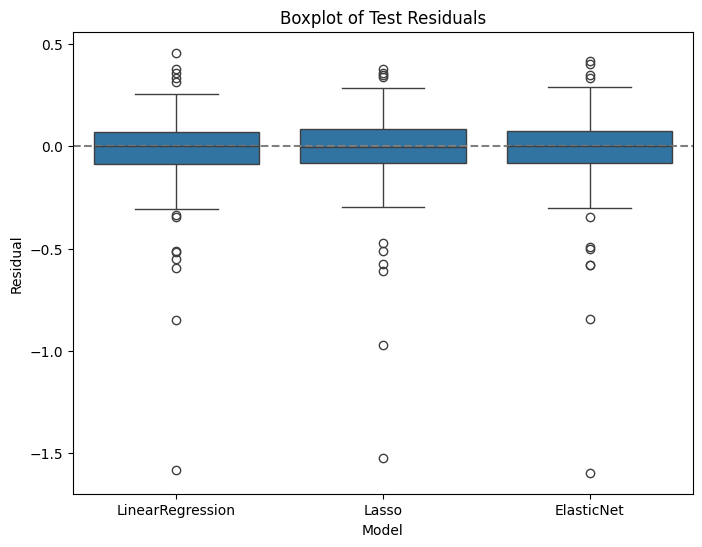

In [316]:
import seaborn as sns
# DataFrame
residuals_df = pd.DataFrame({
    'LinearRegression': y_test - y_test_pred_lin,
    'Lasso': y_test - y_test_pred_lasso,
    'ElasticNet': y_test - y_test_pred_eNet
})

residuals_long = residuals_df.melt(var_name='Model', value_name='Residual')

# plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model', y='Residual', data=residuals_long)
plt.title("Boxplot of Test Residuals")
plt.axhline(0, color='gray', linestyle='--')
plt.show()


# Part II: Classification

## I.	Create a binary response by determining whether SalePrice is greater than its median.

In [328]:
# set test and training y values
# X_test_cls = x_prepared.copy()
y_train_cls = (train_data_New['SalePrice'] > np.median(train_data_New['SalePrice'])).astype(int)

# X_train_cls = test_x_prepare
y_test_cls = (test_data['SalePrice'] > np.median(test_data['SalePrice'])).astype(int)

In [ ]:
# # # prepare data and data standardize
# number_feature_cls = X_train_cls.select_dtypes(include=['int64','float64']).columns.tolist()
# cat_feature_cls = X_train_cls.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# # # numbers
# num_transformer_cls = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#      ('scaler', StandardScaler())
# ])

# # # object
# cat_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
# ])

# preprocessor_cls = ColumnTransformer(transformers = [
#      ('num', num_transformer, number_feature_cls),
#     ('cat', cat_transformer, cat_feature_cls),
# ])

## II.	(Model-3) Use Logistic regression model to fit the training data, then calculate the confusion matrix, precision, and recall for training and test data. 

In [329]:
# build and fit model
from sklearn.linear_model import LogisticRegression

# log_reg = Pipeline(steps=[
#     ("preprocessor", preprocessor_cls),
#     ("logreg", LogisticRegression())
# ])

log_reg = LogisticRegression()
log_reg.fit(x_prepared, y_train_cls)



LogisticRegression()

In [330]:
log_reg.coef_, log_reg.intercept_

(array([[ 0.3603488 ,  0.48628614,  0.65620406,  0.16777933,  0.65661684,
         -0.13954184,  0.25649823,  2.01429352,  0.42754982,  0.24837358,
          1.08581021,  0.58155751, -0.74073489, -0.71326068,  0.20605032,
          0.24405029,  0.32309579, -0.28978597,  0.02946209,  0.64762657,
         -0.03567296, -0.05825627,  0.11697864,  0.14056637,  0.00228418,
         -0.35375841, -0.63491203,  0.5409828 ]]),
 array([-0.14069219]))

In [331]:
from sklearn.metrics import confusion_matrix

# confusion metrix for training set
y_train_pred_lr = log_reg.predict(x_prepared)

matrix_train_lr = confusion_matrix(y_train_cls, y_train_pred_lr)

# confusion metrix for testing set
y_test_pred_lr = log_reg.predict(test_x_prepare)

matrix_test_lr =confusion_matrix(y_test_cls, y_test_pred_lr)
matrix_train_lr,matrix_test_lr

(array([[408,  37],
        [ 38, 407]]),
 array([[109,   5],
        [  8, 104]]))

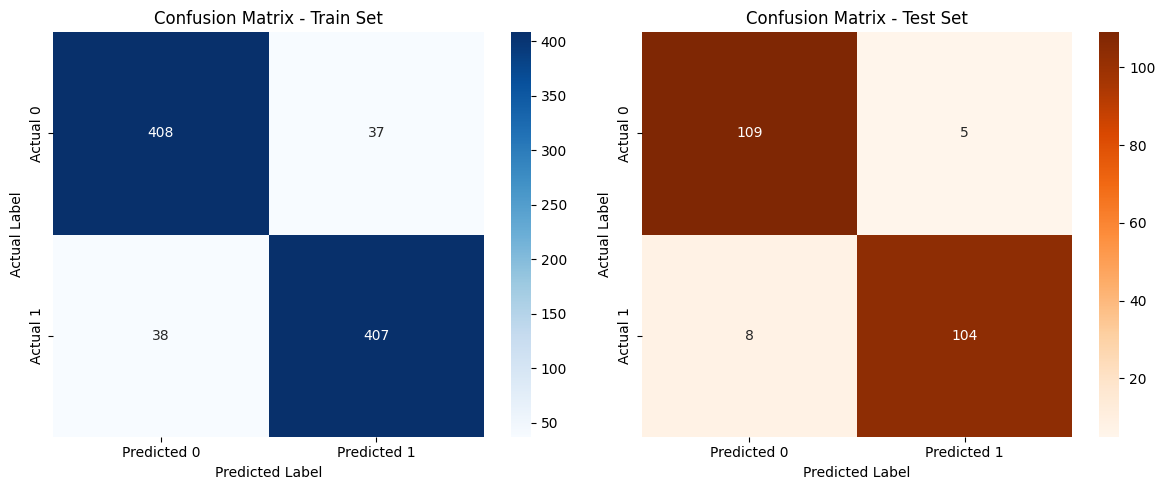

In [359]:
# creat DataFrame 
df_cm_train = pd.DataFrame(matrix_train_lr, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
df_cm_test = pd.DataFrame(matrix_test_lr, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(df_cm_train, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Confusion Matrix - Train Set")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

sns.heatmap(df_cm_test, annot=True, cmap="Oranges", fmt="d", ax=axes[1])
axes[1].set_title("Confusion Matrix - Test Set")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

In [361]:
# precision and recall
from sklearn.metrics import precision_score, recall_score

precision_test_lr = precision_score(y_test_cls, y_test_pred_lr)
recall_test_lr = recall_score(y_test_cls, y_test_pred_lr)

precision_train_lr = precision_score(y_train_cls, y_train_pred_lr)
recall_train_lr = recall_score(y_train_cls, y_train_pred_lr)

print(f"The precision for training is {precision_train_lr}and test data is {precision_test_lr}.")
print(f"The recall for training is {recall_train_lr}and test data is {recall_test_lr}.")

The precision for training is 0.9166666666666666and test data is 0.9541284403669725.
The recall for training is 0.9146067415730337and test data is 0.9285714285714286.


## III.	(Model-4) Use Logistic regression model with regularization (C parameter) to fit the training data, then calculate the confusion matrix, precision, and recall for training and test data. 

In [333]:
# log_reg_C = Pipeline(steps=[
#     ("preprocessor", preprocessor_cls),
#     ("logreg", LogisticRegression(C = 0.01, max_iter = 10000))
# ])

log_reg_C = LogisticRegression(C = 0.01, max_iter = 10000)
log_reg_C.fit(x_prepared, y_train_cls)

LogisticRegression(C=0.01, max_iter=10000)

In [347]:
# params = {"C": np.logspace(-3, 1, 10)}  # 0.001 ~ 10
params = {"C": np.linspace(0.01, 2, 10)}

# put cv as integer no shuffle
grid_logregC = GridSearchCV(log_reg_C, params, cv =5)

grid_logregC.fit(x_prepared, y_train_cls)

best_C = grid_logregC.best_params_['C']
best_logregC = grid_logregC.best_estimator_

print(f"Best C : {best_C:.5f}")

Best C : 0.23111


In [357]:
# confusion metrix for training set
y_train_pred_lrc = best_logregC.predict(x_prepared)

matrix_train_lrc = confusion_matrix(y_train_cls, y_train_pred_lrc)

# confusion metrix for testing set
y_test_pred_lrc = best_logregC.predict(test_x_prepare)

matrix_test_lrc =confusion_matrix(y_test_cls, y_test_pred_lrc)

print(f"the confusion matrix for training is :{matrix_train_lrc} and test data is :{matrix_test_lrc}.")


the confusion matrix for training is :[[410  35]
 [ 39 406]] and test data is :[[109   5]
 [  9 103]].


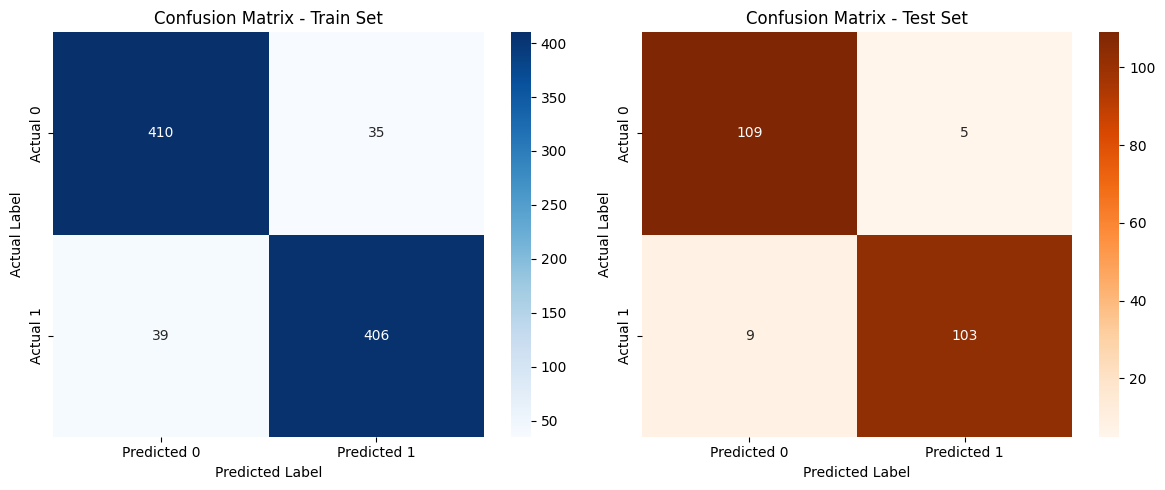

In [358]:
# creat DataFrame to plot matrix
df_cm_train = pd.DataFrame(matrix_train_lrc, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
df_cm_test = pd.DataFrame(matrix_test_lrc, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(df_cm_train, annot=True, cmap="Blues", fmt="d", ax=axes[0])
axes[0].set_title("Confusion Matrix - Train Set")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("Actual Label")

sns.heatmap(df_cm_test, annot=True, cmap="Oranges", fmt="d", ax=axes[1])
axes[1].set_title("Confusion Matrix - Test Set")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("Actual Label")

plt.tight_layout()
plt.show()

In [360]:
# precision and recall
precision_test_lrc = precision_score(y_test_cls, y_test_pred_lrc)
recall_test_lrc = recall_score(y_test_cls, y_test_pred_lrc)

precision_train_lrc = precision_score(y_train_cls, y_train_pred_lrc)
recall_train_lrc = recall_score(y_train_cls, y_train_pred_lrc)

recall_train_lrc, precision_train_lrc, recall_train_lrc, precision_train_lrc

print(f"The precision for training is {precision_train_lrc}and test data is {precision_test_lrc}.")
print(f"The recall for training is {recall_train_lrc}and test data is {recall_test_lrc}.")

The precision for training is 0.9206349206349206and test data is 0.9537037037037037.
The recall for training is 0.9123595505617977and test data is 0.9196428571428571.


## IV.	Plot ROC curves for Model-3 and Model-4. Discuss the performances of the two models 

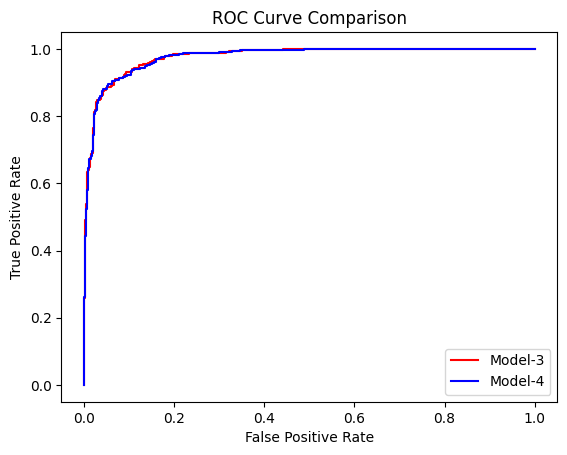

In [363]:
from sklearn.metrics import roc_curve

# model 3
decision_func_train_lr = log_reg.decision_function(x_prepared)
fpr, tpr, thresholds = roc_curve(y_train_cls, decision_func_train_lr)

# model 4
decision_func_train_lrc = best_logregC.decision_function(x_prepared)
fpr2, tpr2, thresholds2 = roc_curve(y_train_cls, decision_func_train_lrc)

plt.plot(fpr, tpr, 'r-', label = 'Model-3')
plt.plot(fpr2,tpr2, 'b-', label = 'Model-4')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()